<a href="https://colab.research.google.com/github/PraveenGill/Project/blob/main/LSTM_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images. This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.

# **Importing Required Libraries**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

#**Downloading Dataset using yfinance library**

In [74]:
# Create input field for our desired stock
yf.pdr_override()
stock=input("Enter a stock symbol: ")

Enter a stock symbol: AMZN


In [75]:
ending = datetime.now()
starting = datetime(ending.year - 1, ending.month, ending.day)
df=yf.download(stock,starting,ending)
print(df)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-08  127.720001  130.279999  127.099998  129.820007  129.820007   
2022-09-09  130.910004  133.690002  130.759995  133.270004  133.270004   
2022-09-12  134.100006  136.490005  134.000000  136.449997  136.449997   
2022-09-13  131.009995  131.399994  126.269997  126.820000  126.820000   
2022-09-14  127.360001  128.839996  126.330002  128.550003  128.550003   
...                ...         ...         ...         ...         ...   
2023-08-31  135.059998  138.789993  135.000000  138.009995  138.009995   
2023-09-01  139.460007  139.960007  136.880005  138.119995  138.119995   
2023-09-05  137.729996  137.800003  135.820007  137.270004  137.270004   
2023-09-06  136.320007  137.449997  134.610001  135.360001  135.360001   
2023-09-07  133.899994  138.029999  133.160

# **Exploring and Visualizing Dataset**

Firstly, we would visualize the closing price history.

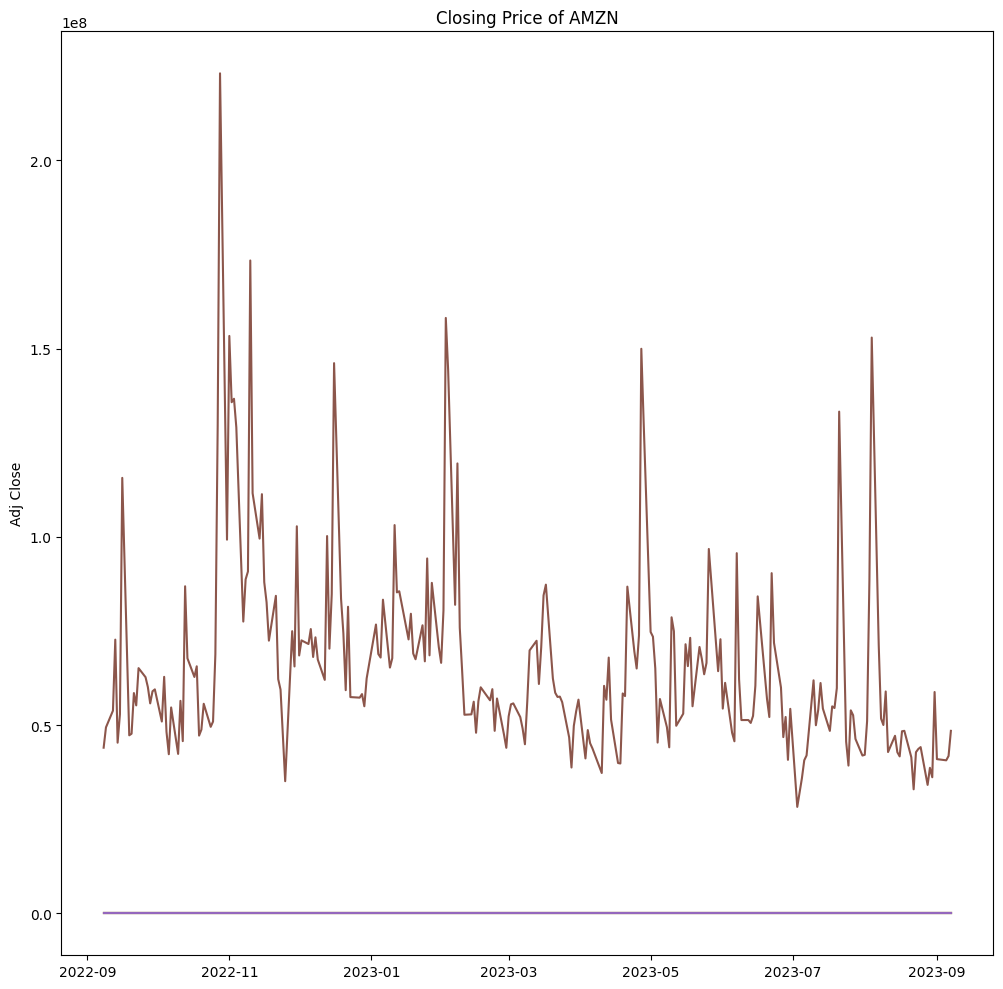

In [76]:
# Let's see a historical view of the closing price
plt.figure(figsize=(10, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.plot(df)
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of "+stock)
plt.tight_layout()

Now we would visualize total volume of stock v/s each day

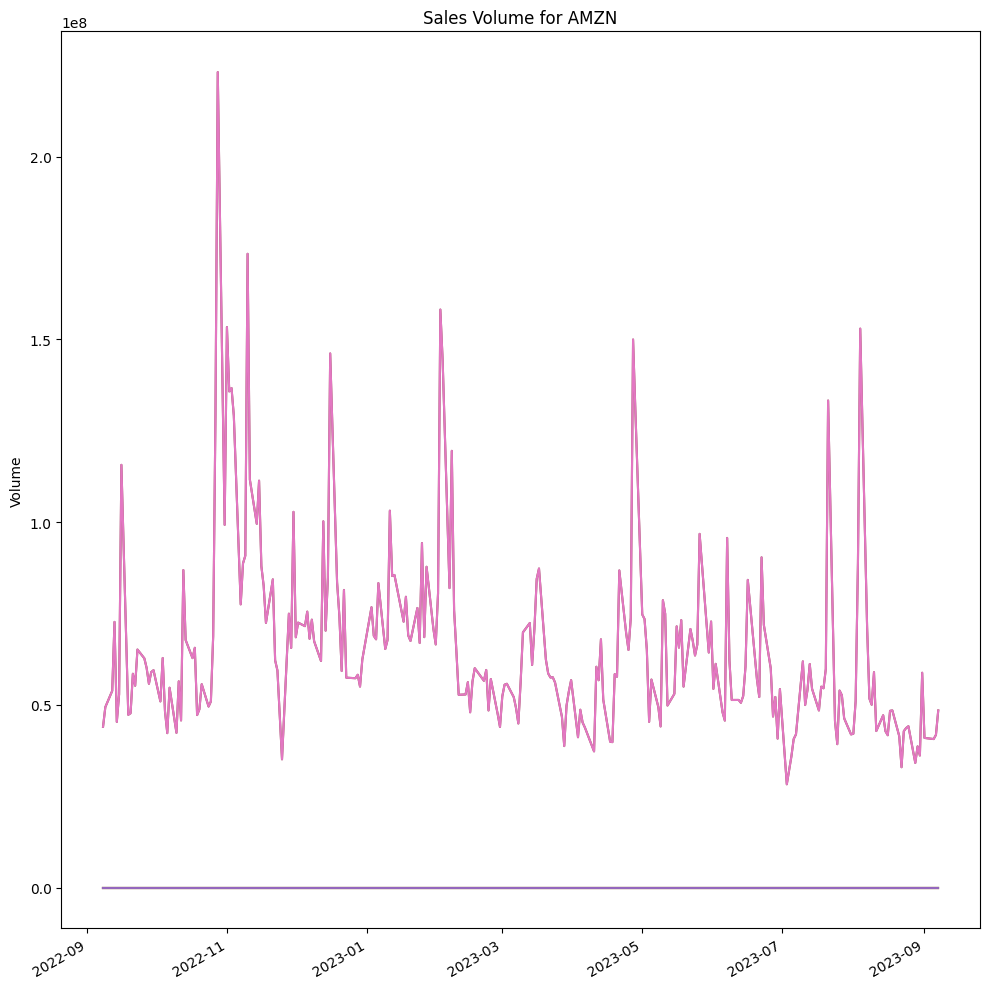

In [77]:
# Now let's plot the total volume of stock v/s each day
plt.figure(figsize=(10, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.plot(df)
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume for "+stock)
plt.tight_layout()

Visualization of stock data for 10, 20 and 50 days on single plot.

<Figure size 2000x2000 with 0 Axes>

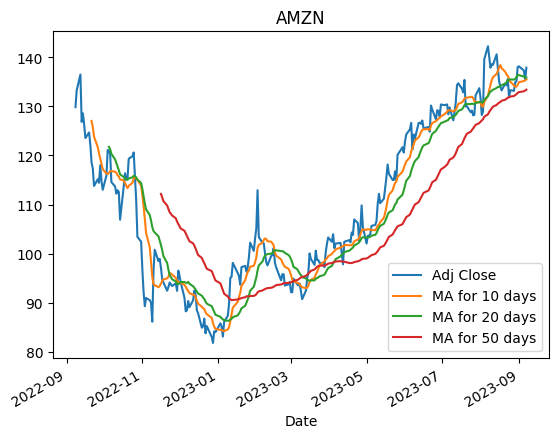

In [78]:
days = [10, 20, 50]
for i in days:
  column_name = f"MA for {i} days"
  df[column_name] = df['Adj Close'].rolling(i).mean()
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title(stock)
fig.tight_layout()

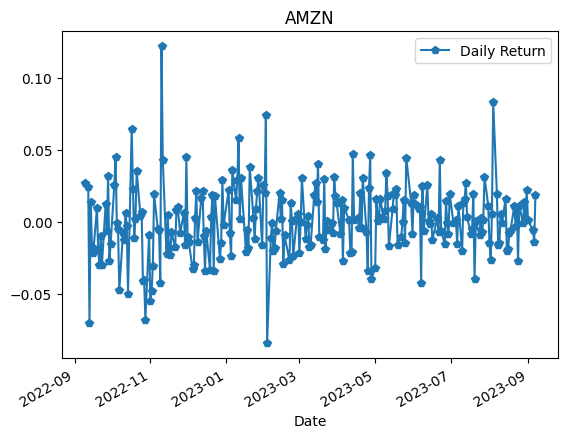

In [79]:
# We'll use pct_change to find the percent change for each day
df['Daily Return'] = df['Adj Close'].pct_change()
fig.set_figheight(10)
fig.set_figwidth(15)
df['Daily Return'].plot( legend=True,marker='p')
plt.title(stock)
fig.tight_layout()

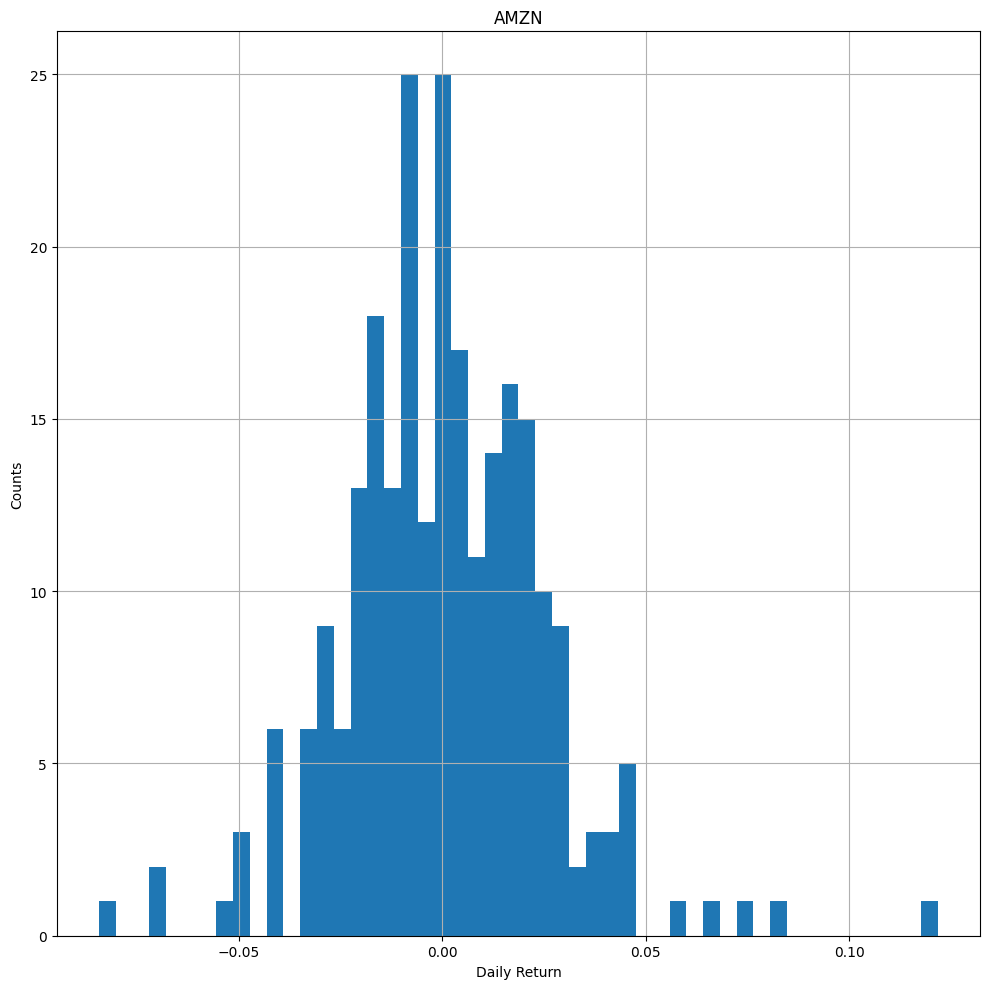

In [80]:
plt.figure(figsize=(10, 10))
plt.plot()
df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(stock)
plt.tight_layout()

Required data is fetched from yahoo directory using get_data_yahoo() function

In [81]:
# Get the stock quote
df = pdr.get_data_yahoo(stock, start='2013-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500,65420000
2013-01-03,12.863500,13.044000,12.818500,12.924000,12.924000,55018000
2013-01-04,12.879000,12.990000,12.832500,12.957500,12.957500,37484000
2013-01-07,13.148500,13.486500,13.133500,13.423000,13.423000,98200000
2013-01-08,13.353500,13.449000,13.178500,13.319000,13.319000,60214000
...,...,...,...,...,...,...
2023-08-31,135.059998,138.789993,135.000000,138.009995,138.009995,58781300
2023-09-01,139.460007,139.960007,136.880005,138.119995,138.119995,40948300
2023-09-05,137.729996,137.800003,135.820007,137.270004,137.270004,40636700


Now, we would visualize the trend of 'Closing Price' of enetered company stock. further we would create the model to predict the closing price of that company.

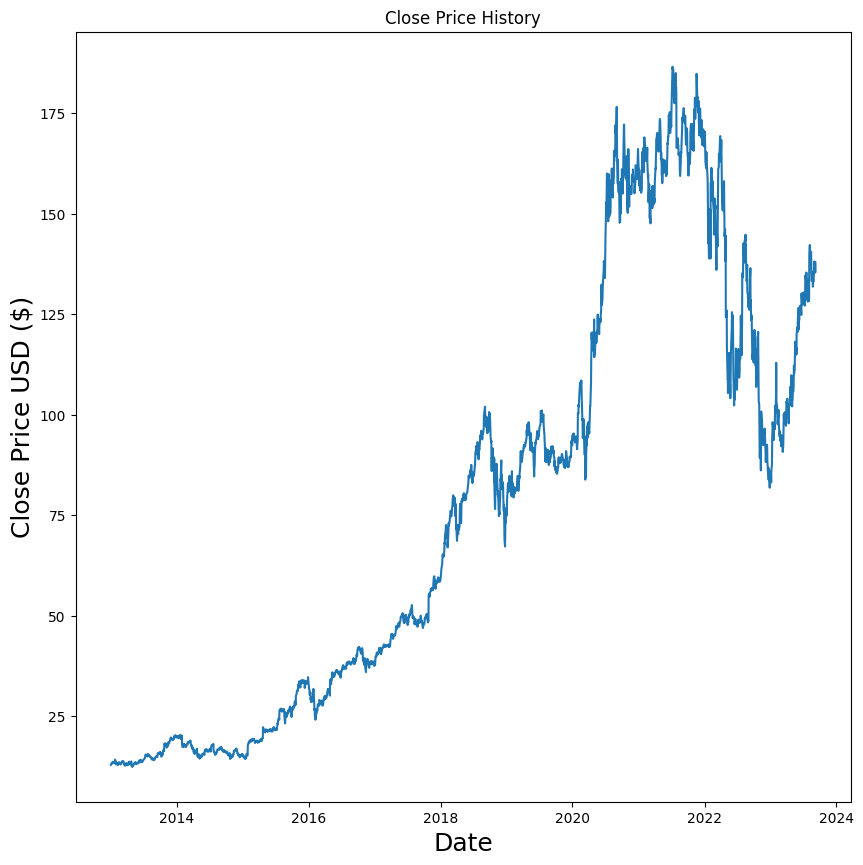

In [82]:
plt.figure(figsize=(10,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# **Data Prepration**

In [83]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2555

#Scaling of data

In [84]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00260682],
       [0.00294271],
       [0.00313507],
       ...,
       [0.71692251],
       [0.7059555 ],
       [0.72025281]])

# **Train-Test Split**

In [85]:
# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00260682, 0.00294271, 0.00313507, 0.00580791, 0.00521076,
       0.00520214, 0.00491218, 0.00565862, 0.0070338 , 0.00679552,
       0.00594284, 0.00638784, 0.00685868, 0.00630458, 0.00570743,
       0.00724338, 0.01026648, 0.00798408, 0.00347958, 0.00704241,
       0.00495811, 0.00481457, 0.00337335, 0.00535717, 0.00401645,
       0.00344513, 0.00393893, 0.00257811, 0.00300588, 0.00609788,
       0.00603184, 0.00484041, 0.00617826, 0.00521937, 0.00508443,
       0.00493515, 0.00334177, 0.00319536, 0.00431215, 0.00460499,
       0.00502701, 0.0071429 , 0.00785489, 0.00733812, 0.00736396,
       0.00745296, 0.00660603, 0.00743573, 0.00771422, 0.00502701,
       0.00390161, 0.00277333, 0.00234843, 0.0025982 , 0.00148141,
       0.00273313, 0.00223646, 0.0034681 , 0.0049007 , 0.00524234])]
[0.003841315629562053]

[array([0.00260682, 0.00294271, 0.00313507, 0.00580791, 0.00521076,
       0.00520214, 0.00491218, 0.00565862, 0.0070338 , 0.00679552,
       0.00594284, 0.00638784, 0.0

#**Building LSTM Model**


In [86]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2495/2495 [==============================] - 111s 43ms/step - loss: 0.0014


In [87]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

#**Prediction of Price values**

In [88]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 2s 58ms/step


#**Visualizing the Model**

<ipython-input-89-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


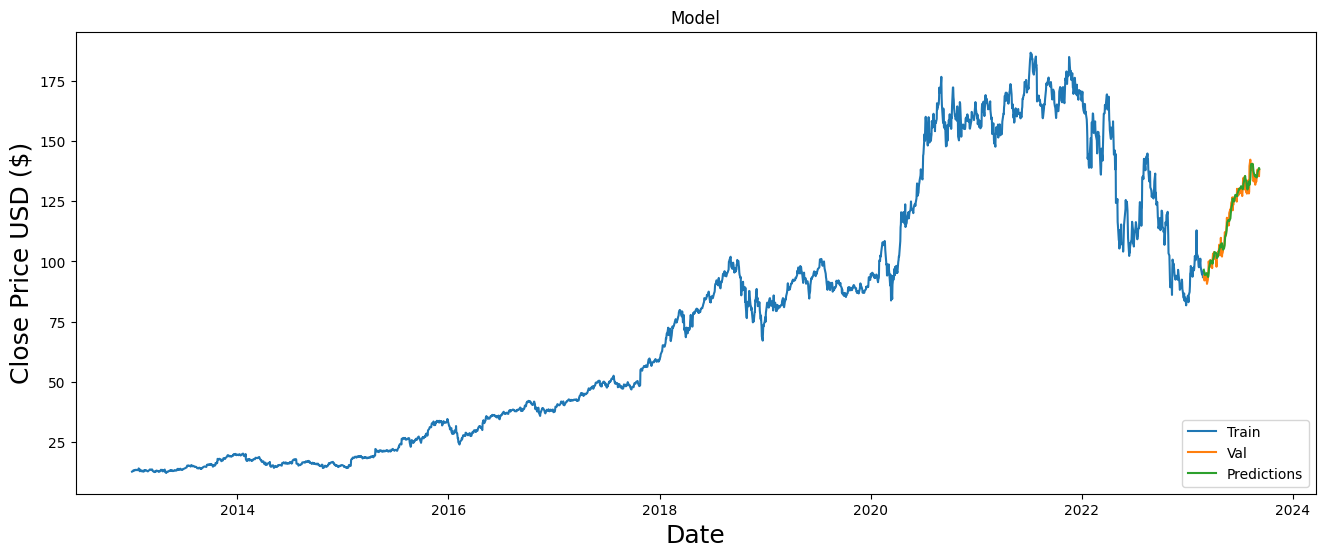

In [89]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [90]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-02-27,93.760002,96.578850
2023-02-28,94.230003,95.903328
2023-03-01,92.169998,95.597771
2023-03-02,92.129997,94.971176
2023-03-03,94.900002,94.385536
...,...,...
2023-08-31,138.009995,135.801559
2023-09-01,138.119995,137.058563
2023-09-05,137.270004,138.221970


#**Model Evaluation**

In [91]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.5878471483401833